<a href="https://colab.research.google.com/github/Criz23/TI_1_Practica2_JRM/blob/main/TI_1_Practica2_JRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Javier Rosales Martínez  
**e-mail:** j.rosales@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0

![levy.png](attachment:levy.png)

In [ ]:
from ast import List
std_motion_steps = 3.0
Levy_exponents = [0.1, 0.5, 1.0, 1.9]
beta = 0
Levy_pdf = list()

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, 400)
for i in range(len(Levy_exponents)):
  Levy_pdf.append(np.array([levy_stable.pdf(j, alpha=Levy_exponents[i], beta=beta, loc=std_motion_steps) for j in aux_domain]))

In [34]:
fig_Levy_pdf = go.Figure()
for k in range(len(Levy_pdf)):

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                          y= Levy_pdf[k],
                                          marker = dict(size=2),
                                          line = dict(width=2),
                                          mode = 'lines',
                                          name = 'Levy_{}'.format(Levy_exponents[k]),
                                          showlegend = True
                                          ))
fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

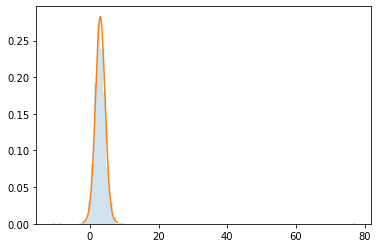

In [66]:
Levy_rvs = levy_stable.rvs(Levy_exponents[3], beta, loc=std_motion_steps, size=1000)

plt.hist(Levy_rvs, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='Levy walk histo')
plt.plot(aux_domain, Levy_pdf[3])

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las debe tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*